In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка и первичный анализ данных

Используем данные с сайта Book24

In [22]:
data = pd.read_json('data/project_book.json')

In [23]:
data.shape

(15000, 10)

In [24]:
data.dtypes

name            object
author          object
section         object
publish         object
age             object
year           float64
pages          float64
rating          object
cove            object
description     object
dtype: object

In [45]:
data.isnull().sum()

name             0
author           0
section          0
publish          0
age              0
year           222
pages          316
rating           0
cove             0
description      0
dtype: int64

In [46]:
data[(data.name == 'NaN')].shape

(232, 10)

In [26]:
data

,name,author,section,publish,age,year,pages,rating,cove,description
0,Благословение небожителей. Том 2,Тунсю Мосян,Новеллизации,Эксмо,18+,2022.0,432.0,5,https://ndc.book24.ru/resize/410x590/iblock/a5...,"Всё в этом мире имеет счёт: и удача, и невезен..."
1,Благословение небожителей. Том 1,Тунсю Мосян,Новеллизации,Эксмо,16+,2022.0,416.0,"4,9",https://ndc.book24.ru/resize/410x590/iblock/ac...,В незапамятные времена Се Лянь был наследным п...
2,Лето в пионерском галстуке,Сильванова Катерина,Современные любовные романы,Popcorn Books,18+,2021.0,544.0,"4,9",https://ndc.book24.ru/resize/410x590/iblock/25...,Юра возвращается в пионерский лагерь своей юно...
3,Электрошок. Внезапно,Сергей Тармашев,Социальная фантастика,АСТ,16+,2022.0,352.0,"0,0",https:https://cdn.book24.ru/v2/ASE000000000863...,Новая книга от автора культовых циклов «Древни...
4,Билли Саммерс,Стивен Кинг,Зарубежные детективы,АСТ,16+,2022.0,544.0,"4,4",https://ndc.book24.ru/resize/410x590/iblock/a2...,Новый увлекательный роман от автора культовых ...
...,...,...,...,...,...,...,...,...,...,...
14995,"Винт Разболтайло. Гениальный, как я",Руди Сальваньини,Комиксы для детей,АСТ,6+,2019.0,192.0,5,https:https://cdn.book24.ru/v2/ASE000000000837...,"Настоящий гений — личность, наделённая уникаль..."
14996,Тобол. Мало избранных,Алексей Иванов,Историческая проза,АСТ,16+,2019.0,832.0,"4,8",https:https://cdn.book24.ru/v2/ASE000000000842...,"Специальное издание к премьере фильма ""Тобол"" ..."
14997,Крыша мира,Владислав Выставной,Постапокалипсис,АСТ,18+,2019.0,352.0,"4,4",https:https://cdn.book24.ru/v2/ASE000000000841...,﻿Лед и камень сжали в кулак последний анклав ч...
14998,Убить пересмешника. Графический роман,Харпер Ли,Графические романы,АСТ,16+,2019.0,288.0,5,https:https://cdn.book24.ru/v2/ASE000000000840...,"Штат Алабама, 1930-е годы, время Великой Депре..."


In [79]:
# Удаление строк, содержащих ненужные книги
list = data[(data.section == 'Книги на английском языке')].index
data2 = data.drop(index=list)
list = data2[(data2.section == 'Артбуки')].index
data3 = data2.drop(index=list)
list = data3[(data3.section == 'Восточная философия')].index
data4 = data3.drop(index=list)
list = data4[(data4.section == 'Книги на других языках')].index
data5 = data4.drop(index=list)
list = data5[(data5.section == 'Биографии. Мемуары')].index
data5 = data5.drop(index=list)
list = data5[(data5.section == 'Книги на немецком языке')].index
data5 = data5.drop(index=list)
list = data5[(data5.section == 'Пословицы и поговорки')].index
data5 = data5.drop(index=list)
list = data5[(data5.section == 'Деятели культуры и искусства')].index
data5 = data5.drop(index=list)
(data.shape, data5.shape)

((15000, 10), (14678, 10))

### Гистограммы по признакам

In [31]:
data['section'].unique().shape

(153,)

<AxesSubplot:>

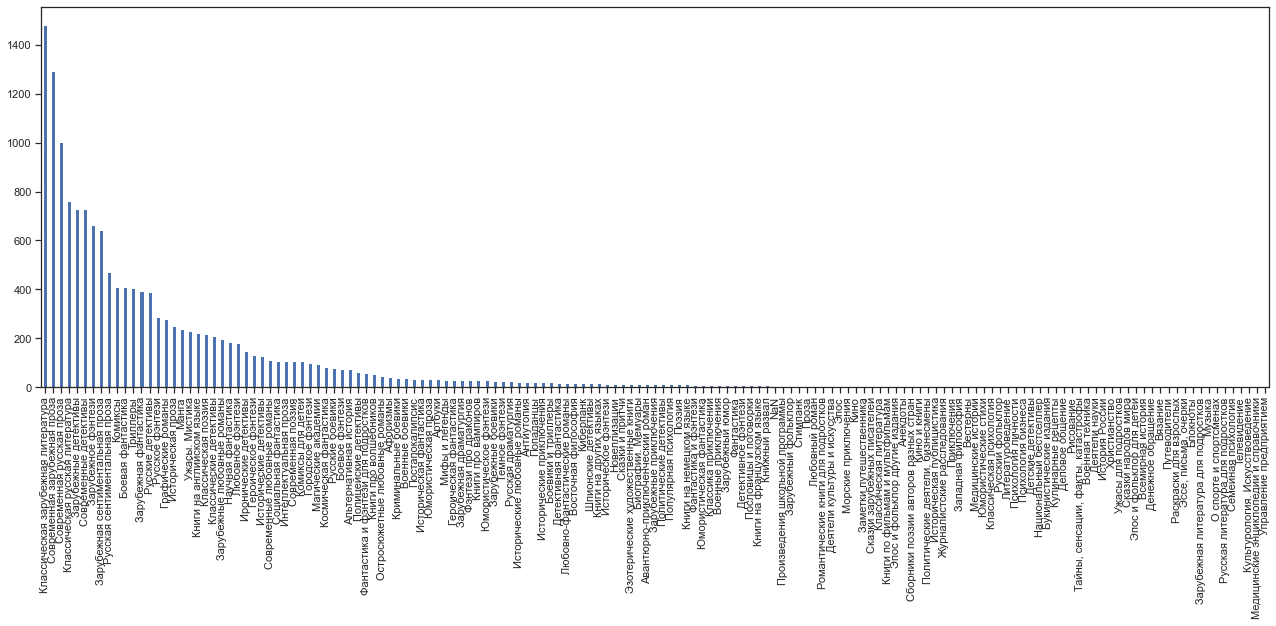

In [41]:
# Genre distribution
data['section'].value_counts().plot(x ='count', y = 'section', kind = 'bar', figsize = (22,7))

In [69]:
data[(data.section == 'Книги на английском языке')]

,name,author,section,publish,age,year,pages,rating,cove,description
915,Вокруг света за 80 дней. Уровень 1,Жюль Верн,Книги на английском языке,АСТ,12+,2021.0,128.0,5,https:https://cdn.book24.ru/v2/ASE000000000861...,Увлекательная история удивительного путешестви...
1096,NaN,Легко читаем по-английски,Книги на английском языке,АСТ,12+,2022.0,64.0,"4,9",https:https://cdn.book24.ru/v2/ASE000000000854...,"В эту книгу вошло семь английских сказок, кото..."
1171,Путешествие к центру Земли. Уровень 2,Жюль Верн,Книги на английском языке,АСТ,12+,2021.0,128.0,"4,5",https:https://cdn.book24.ru/v2/ASE000000000834...,Серия «Легко читаем по-английски» - это самые ...
1624,NaN,Легко читаем по-английски,Книги на английском языке,АСТ,16+,2021.0,96.0,"4,7",https:https://cdn.book24.ru/v2/ASE000000000721...,Предлагаем вашему вниманию книги серии «Легко ...
1877,NaN,Легко читаем по-английски,Книги на английском языке,АСТ,12+,2021.0,96.0,5,https:https://cdn.book24.ru/v2/ASE000000000714...,В книгу вошел незначительно сокращенный и упро...
...,...,...,...,...,...,...,...,...,...,...
14209,NaN,NaN,Книги на английском языке,Эксмо,12+,2018.0,168.0,"4,6",https:https://cdn.book24.ru/v2/ITD000000000904...,Этот графический роман-билингва по суперпопуля...
14356,Рассказы = Short Stories + аудиоприложение LECTA,О. Генри,Книги на английском языке,АСТ,12+,2019.0,256.0,5,https:https://cdn.book24.ru/v2/ASE000000000835...,Лучший способ учить иностранный язык – читать ...
14363,Мартин Иден,Джек Лондон,Книги на английском языке,АСТ,12+,2019.0,320.0,5,https://ndc.book24.ru/resize/410x590/iblock/0b...,"В серию «Учим английский, читая классику» вход..."
14395,NaN,Эксклюзивный самоучитель,Книги на английском языке,АСТ,12+,2021.0,704.0,5,https:https://cdn.book24.ru/v2/ASE000000000837...,В серию «Эксклюзивный самоучитель» входят слов...
